In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import os

In [13]:
Data = os.path.join(os.path.expanduser("~"), "Desktop", "Credit_data.csv")
data = pd.read_csv(Data)

data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


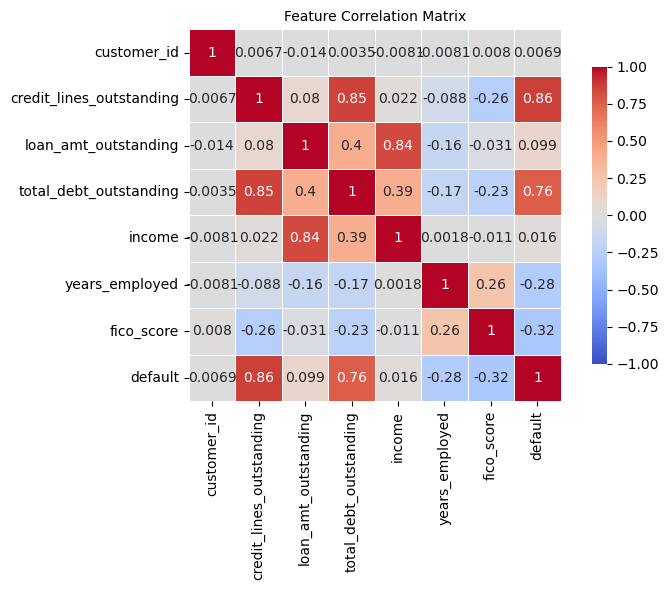

In [14]:
correlation_matrix = data.corr()

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color palette
    center=0,  # Center color scale at 0
    vmin=-1, 
    vmax=1,
    square=True,  # Make plot square
    linewidths=0.5,  # Add lines between cells
    cbar_kws={"shrink": .8}  # Adjust colorbar size
)
plt.title('Feature Correlation Matrix', fontsize=10)
plt.tight_layout()
plt.show()

In [15]:
data['default'].value_counts(normalize=True)

0    0.8149
1    0.1851
Name: default, dtype: float64

In [16]:
X = data.drop(['default', 'customer_id'], axis=1)
y = data['default']
X.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,0,5221.545193,3915.471226,78039.38546,5,605
1,5,1958.928726,8228.752520,26648.43525,2,572
2,0,3363.009259,2027.830850,65866.71246,4,602
3,0,4766.648001,2501.730397,74356.88347,5,612
4,1,1345.827718,1768.826187,23448.32631,6,631


In [17]:
# Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [18]:
#Fit the model
model = LogisticRegression(random_state=14)
model.fit(X_train, y_train)

LogisticRegression(random_state=14)

In [19]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [20]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

In [21]:
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

# Print performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")


Model Coefficients:
credit_lines_outstanding: 0.7822
loan_amt_outstanding: 0.0003
total_debt_outstanding: 0.0017
income: -0.0003
years_employed: -1.0661
fico_score: 0.0014
Intercept: 0.1073

Performance Metrics:
Accuracy: 0.9870
Precision: 0.9770
Recall: 0.9550
F1 Score: 0.9659
AUC-ROC: 0.9990



Confusion Matrix:
[[2409   13]
 [  26  552]]


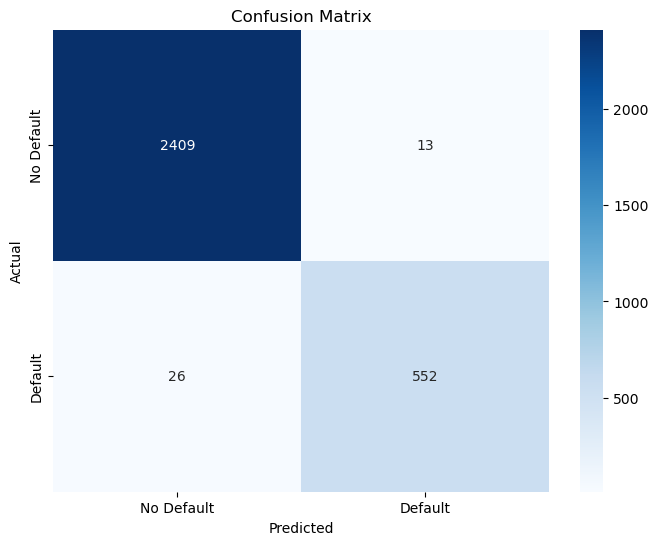

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['No Default', 'Default'],
           yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


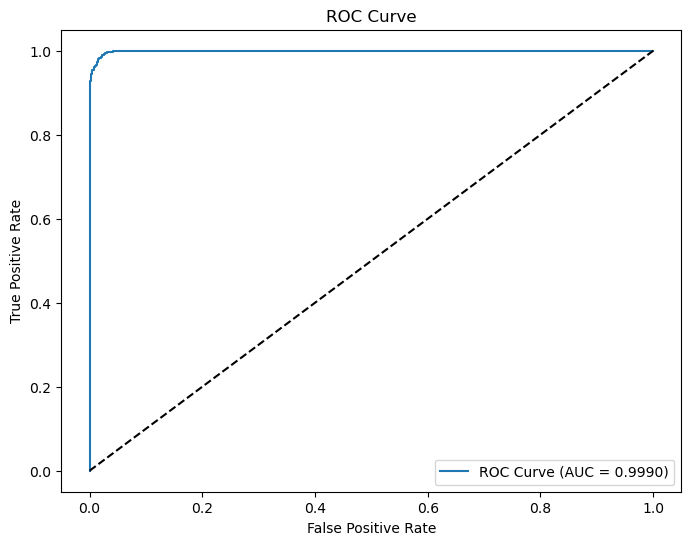

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

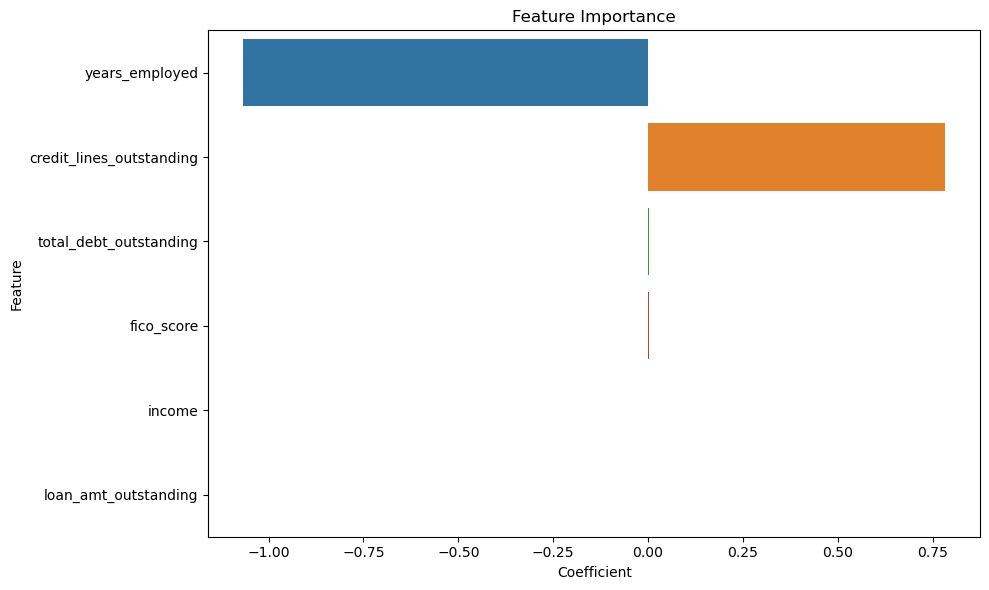

In [24]:
# Feature importance
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()